# Example 1: Classification

## Data & WD

### Libraries

In [63]:
# Data manipulation
# ==============================================================================

import os 
import pandas as pd
import numpy as np
import operator
from joblib import dump
from joblib import dump


# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from sklearn.model_selection import train_test_split, learning_curve, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, roc_curve, auc, confusion_matrix

# Modeling 
# ==============================================================================

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

### Set Working directory

In [51]:
# Set the working directory

workspace_directory = "/Users/oskyroski/DataScience/MachineLearning/1. Supervised Classication"
os.chdir(workspace_directory)


## 0. Understand the business

In the context of healthcare, the early detection and accurate diagnosis of diabetes are critical for effective disease management and improved patient outcomes. Monitoring physiological variables such as glucose levels, insulin, body mass index (BMI), blood pressure, and others plays a pivotal role in understanding an individual’s risk profile for diabetes. Machine learning models can leverage these variables to identify patterns and associations that might not be immediately apparent to healthcare professionals. By systematically analyzing these data points, the models can predict the likelihood of diabetes onset, enabling preventive measures or early treatment. This proactive approach can significantly reduce the burden of the disease on patients by potentially preventing complications, decreasing the need for invasive treatments, and lowering healthcare costs. Effective predictive modeling, thus, stands as a powerful tool in modern medicine, offering a data-driven pathway to enhance diabetes care and management.

## 1. Define the problem

### Data Description

In a machine learning project begins with a thorough Data Description, where we must understand the dataset in hand. The Diabetes_prediction dataset contains several medically relevant features such as glucose concentration, insulin levels, blood pressure, BMI, and more, which are critical indicators of an individual's health status

### Objective

Objectives in our context are twofold: to identify the most significant predictors of diabetes and to develop a predictive model that can accurately classify individuals as having a high or low risk of developing diabetes.

### Modeling Approaches

 We aim to employ supervised learning techniques since the dataset includes labeled outcomes—'Diagnosis' indicating positive or negative cases of diabetes. This binary classification problem lends itself well to a variety of algorithms such as logistic regression, support vector machines, random forests, and gradient-boosting machines. We will assess these models based on their accuracy, precision, recall, and the area under the receiver operating characteristic (ROC) curve to ensure the model's robustness and reliability in predicting diabetes. Ultimately, our goal is to create a model that not only predicts the diagnosis accurately but can also serve as a valuable tool for early intervention and management of diabetes.

## 2. Prepare the Data

### Data Gathering

In [52]:
# Load the CSV file
diabetes = pd.read_csv("Diabetes_prediction.csv")

print(diabetes.head())

   Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0  


### EDA 

In [67]:
# Define your features and target variable
X = diabetes.drop('Diagnosis', axis=1)  # Features
y = diabetes['Diagnosis']                # Target variable

In [53]:
# Descriptive statistics table
desc_table = diabetes.describe().transpose()
desc_table['mode'] = diabetes.mode().iloc[0]
desc_table['missing_values'] = diabetes.isnull().sum()

# Display the descriptive statistics table
print(desc_table)

                           count       mean        std         min        25%  \
Pregnancies               1000.0   1.771000   1.354398    0.000000   1.000000   
Glucose                   1000.0  99.440607  19.470730   30.571402  86.145927   
BloodPressure             1000.0  72.179837  13.882017   31.401487  62.795447   
SkinThickness             1000.0  23.278316   1.173807   19.369987  22.501591   
Insulin                   1000.0  84.582679  74.872733 -165.310033  35.076535   
BMI                       1000.0  25.433600   3.690223   13.548818  23.022715   
DiabetesPedigreeFunction  1000.0   0.449383   0.199334    0.100037   0.283376   
Age                       1000.0  43.281798  14.465398   -0.979804  33.518451   
Diagnosis                 1000.0   0.306000   0.461060    0.000000   0.000000   

                                50%         75%         max        mode  \
Pregnancies                2.000000    3.000000    8.000000    1.000000   
Glucose                   99.458362  11

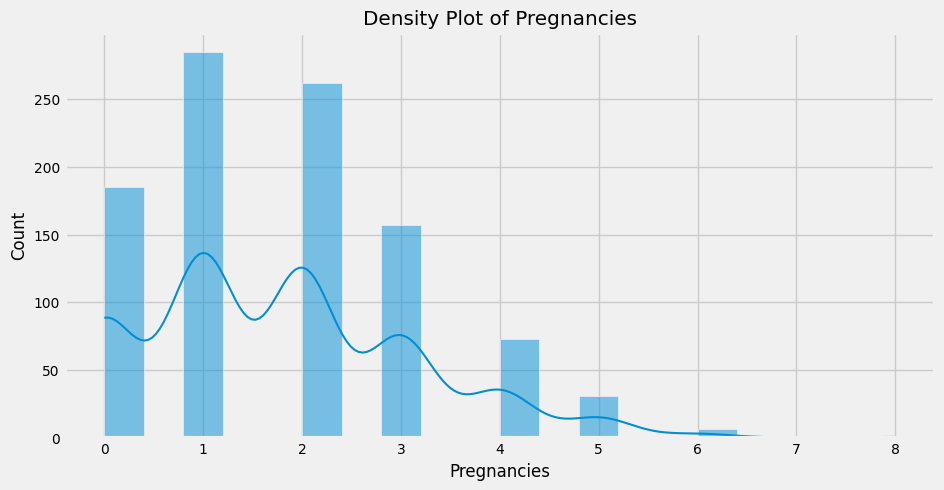

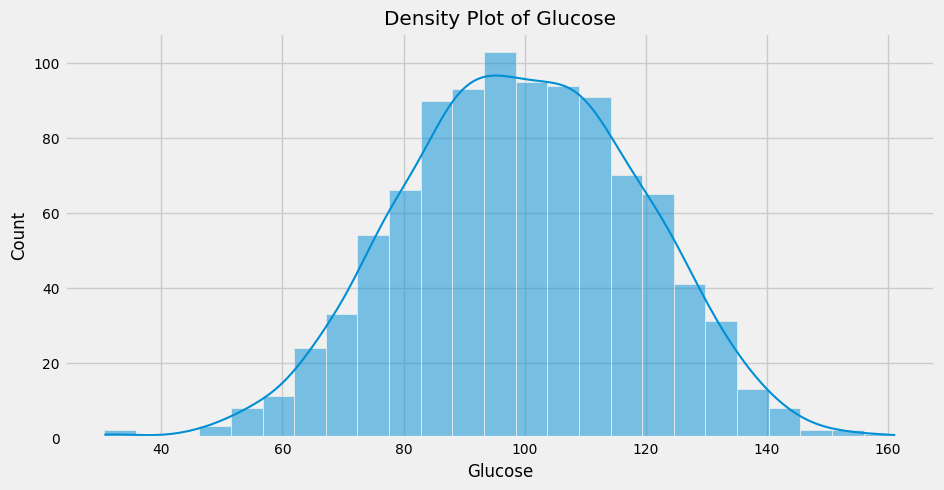

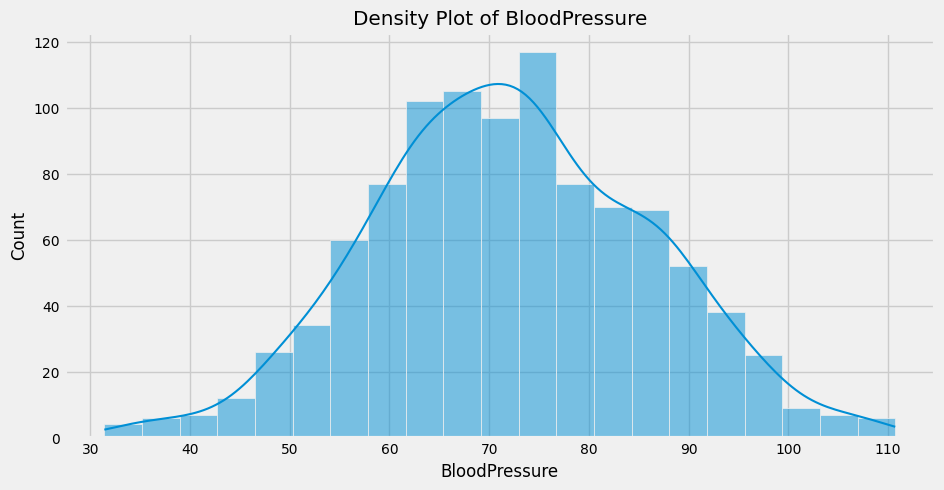

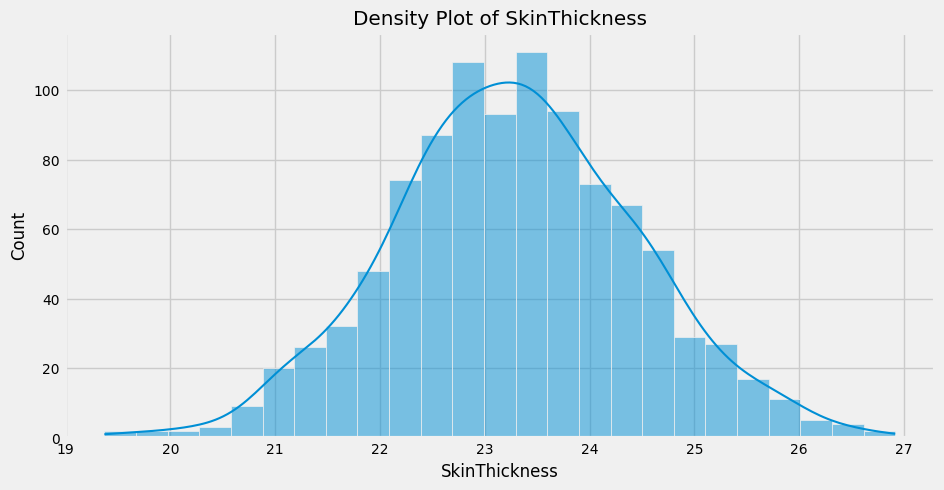

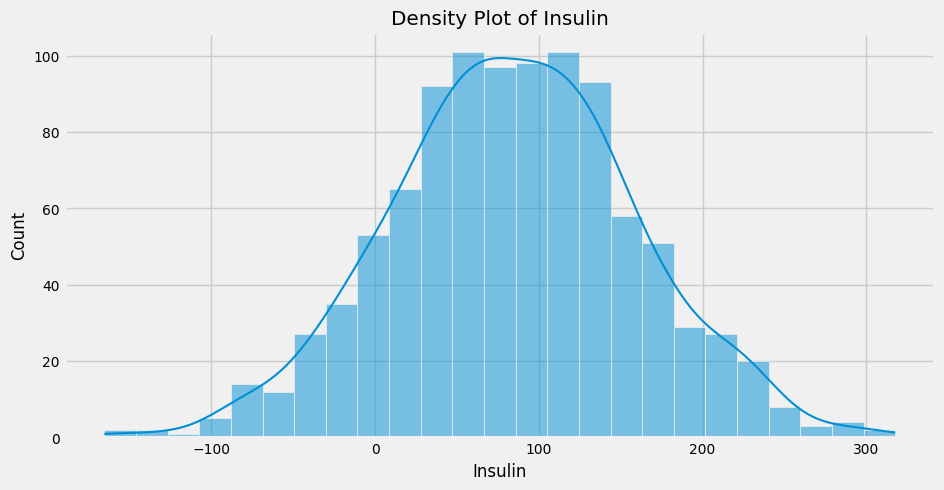

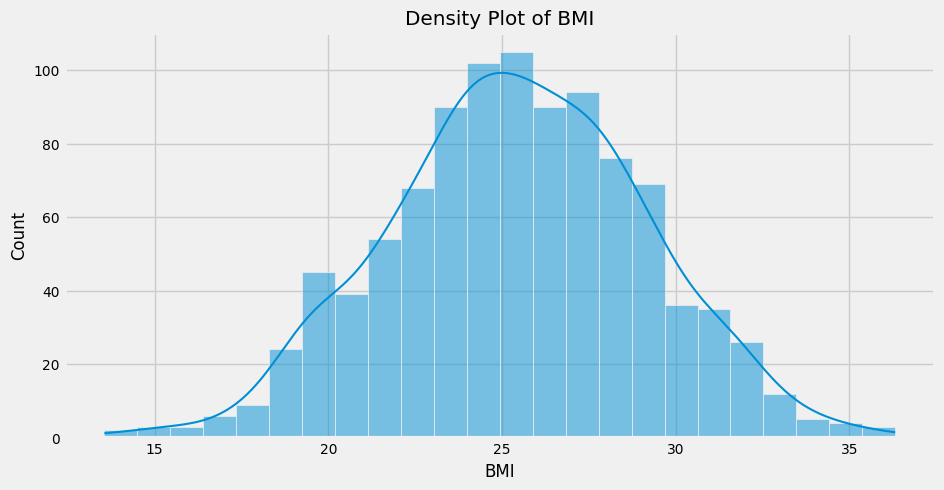

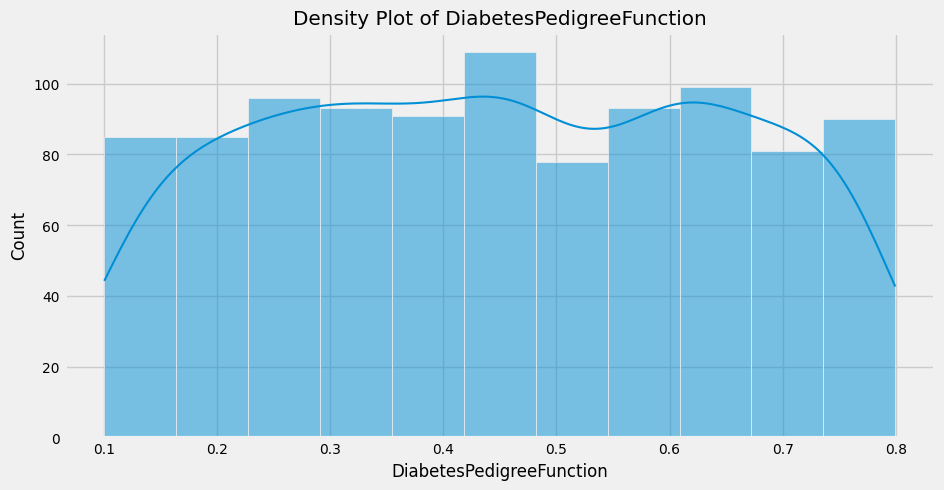

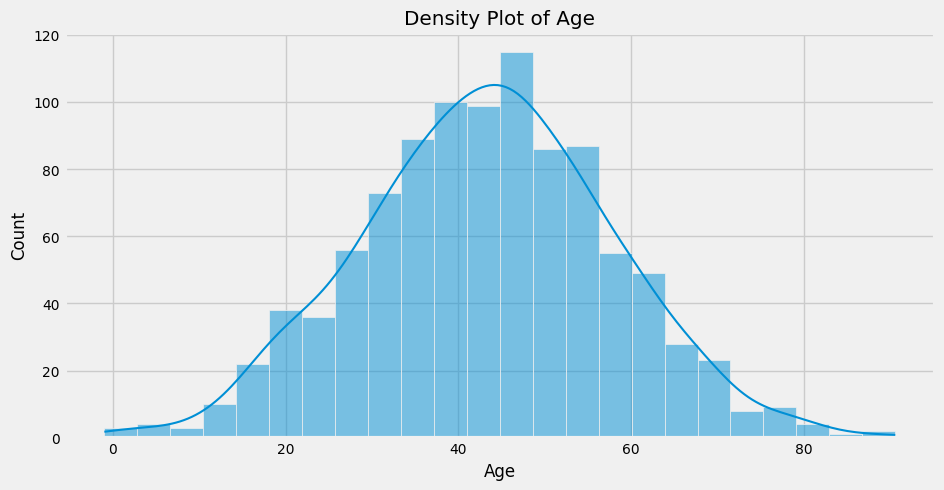

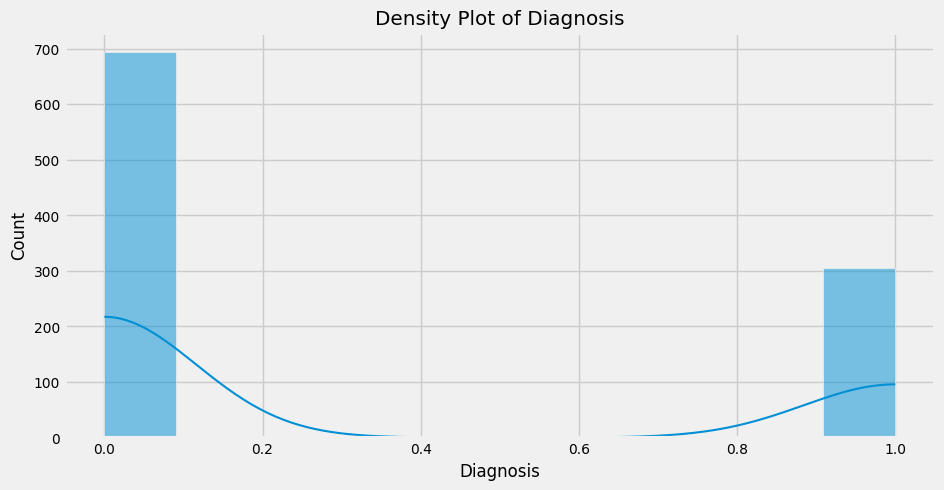

In [54]:
# Plotting cols
for column in diabetes.columns:
    plt.figure(figsize=(10, 5))

    # If the column is numeric, plot a density plot
    if diabetes[column].dtype != 'object':
        sns.histplot(diabetes[column], kde=True)
        plt.title(f'Density Plot of {column}')

    # If the column is categorical, plot a count plot
    else:
        sns.countplot(x=column, data=diabetes)
        plt.title(f'Percentage Plot of {column}')

    plt.show()

### Data Splitting

Let's split the data into  training/testing sets

In [55]:
# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    diabetes.drop('Diagnosis', axis=1),  # features
    diabetes['Diagnosis'],               # target variable
    test_size=0.2,                       # 20% validation set
    random_state=545856                     # seed for reproducibility
)

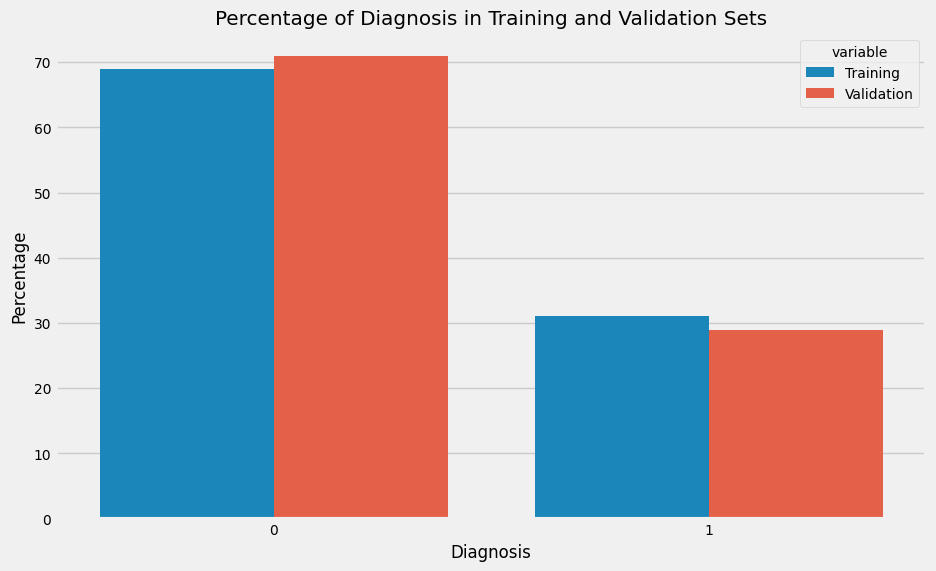

In [56]:
# Now, we calculate the percentage of '0' and '1' in the 'Diagnosis' variable for each set
train_counts = y_train.value_counts(normalize=True) * 100
valid_counts = y_valid.value_counts(normalize=True) * 100

# Prepare the data for plotting
plot_data = pd.DataFrame({'Training': train_counts, 'Validation': valid_counts}).reset_index()
plot_data.rename(columns={'index': 'Diagnosis'}, inplace=True)

# Plotting the data
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data.melt(id_vars='Diagnosis', value_vars=['Training', 'Validation']),
            x='Diagnosis', y='value', hue='variable')
plt.title('Percentage of Diagnosis in Training and Validation Sets')
plt.ylabel('Percentage')
plt.xlabel('Diagnosis')

# Show the plot
plt.show()

## 3. Choose a Model(s)

In the context of classification problems in machine learning, various algorithms can be applied, each with its strengths and applications. Here are eight widely used and powerful methods:

1. Logistic Regression.
2. Decision Trees.
3. Random Forest.
4. Support Vector Machines (SVM).
5. Naive Bayes.
6. K-Nearest Neighbors (KNN).
7. Gradient Boosting Machines (GBM).
8. Neural Networks/Deep Learning.

Each of these algorithms has its specific strengths and may perform differently depending on the nature of the data and the problem

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Instantiate each of the models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC(probability=True)
model5 = GaussianNB()
model6 = KNeighborsClassifier()
model7 = GradientBoostingClassifier()
model8 = MLPClassifier()

## 4. Train the Model

To train the eight models with your dataset, we'll follow these steps for each model:

1. Fit the model on the training set (X_train, y_train).
2. Predict the outcomes on the validation set (X_valid).
3. Calculate the accuracy of the predictions to evaluate the model's performance.

In [58]:
# List to hold models
models = [model1, model2, model3, model4, model5, model6, model7, model8]

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Train each model and evaluate on the validation set
for i, model in enumerate(models, start=1):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_valid)
    
    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_valid, y_pred)
    accuracy_scores[f'Model {i}'] = accuracy

# Sort the accuracy_scores dictionary by its values (accuracy) in descending order
sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

# Display the sorted accuracies
print("Sorted Model Accuracies (from highest to lowest):")
for model, accuracy in sorted_accuracy_scores.items():
    print(f"{model}: {accuracy:.4f}")

# Optionally, save the models to disk
for i, model in enumerate(models, start=1):
    dump(model, f'model{i}.joblib')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sorted Model Accuracies (from highest to lowest):
Model 1: 0.7100
Model 4: 0.7100
Model 3: 0.7050
Model 5: 0.7050
Model 8: 0.6950
Model 7: 0.6800
Model 6: 0.6550
Model 2: 0.5450


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


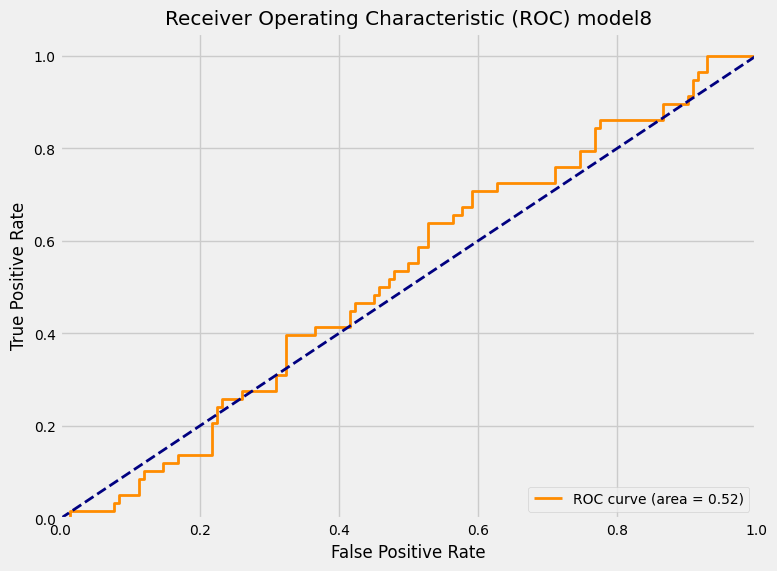

In [59]:

model = model1
model.fit(X_train, y_train)
y_pred_probs = model.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_probs)

roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) model8')
plt.legend(loc="lower right")
plt.show()

## 5. Evaluate the Model

### Metrics 

In [60]:
# List to hold evaluation metrics for all models
metrics = []

# Evaluate each model
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_valid)
    
    # Predict probabilities for AUC
    y_pred_probs = model.predict_proba(X_valid)[:, 1]
    
    # Compile metrics
    model_metrics = {
        'Accuracy': accuracy_score(y_valid, y_pred),
        'Precision': precision_score(y_valid, y_pred),
        'Recall': recall_score(y_valid, y_pred),
        'F1 Score': f1_score(y_valid, y_pred),
        'AUC': roc_auc_score(y_valid, y_pred_probs)
    }
    metrics.append(model_metrics)

# Convert metrics list to DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics, index=[f'Model {i+1}' for i in range(len(models))])

# Display the DataFrame
print(metrics_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_cla

         Accuracy  Precision    Recall  F1 Score       AUC
Model 1     0.710   0.000000  0.000000  0.000000  0.523191
Model 2     0.545   0.220339  0.224138  0.222222  0.450097
Model 3     0.715   0.600000  0.051724  0.095238  0.462300
Model 4     0.710   0.000000  0.000000  0.000000  0.524769
Model 5     0.705   0.000000  0.000000  0.000000  0.501093
Model 6     0.655   0.260870  0.103448  0.148148  0.521370
Model 7     0.680   0.285714  0.068966  0.111111  0.489922
Model 8     0.705   0.000000  0.000000  0.000000  0.449247


### Confusion Matrix Heatmaps 

1. Fit each model on your training data and make predictions on your validation set.
2. Generate a confusion matrix for each model.
3. Plot the confusion matrix as a heatmap.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


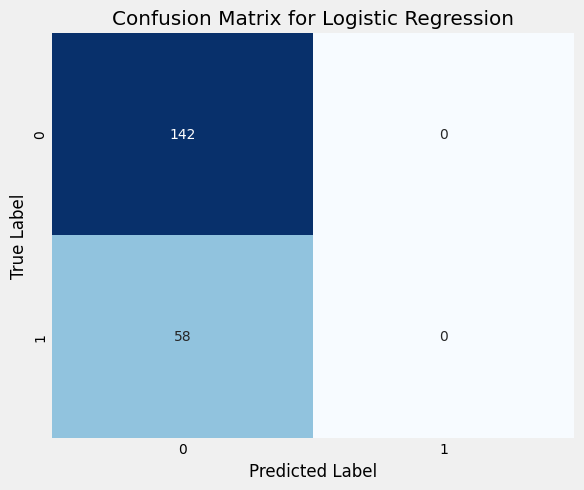

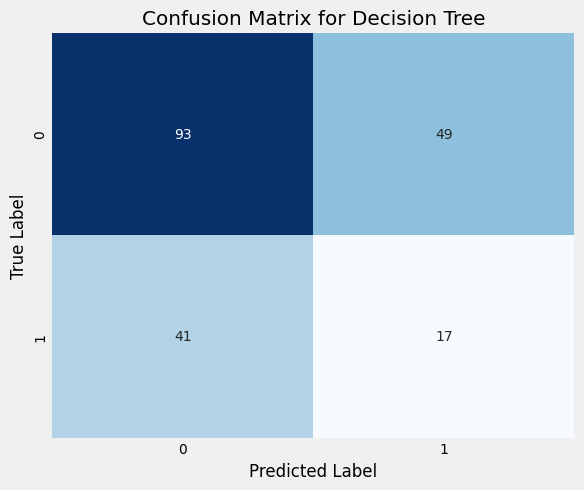

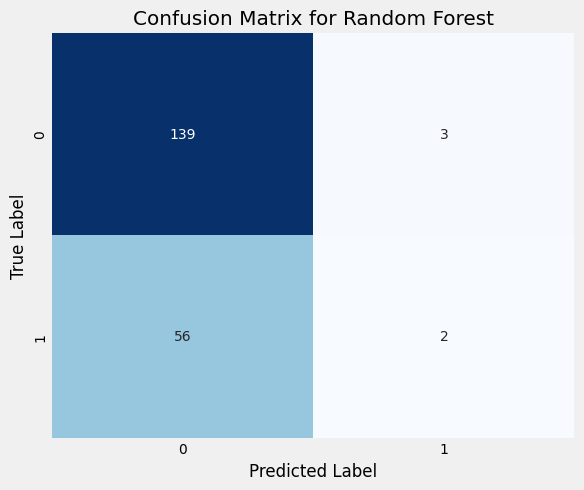

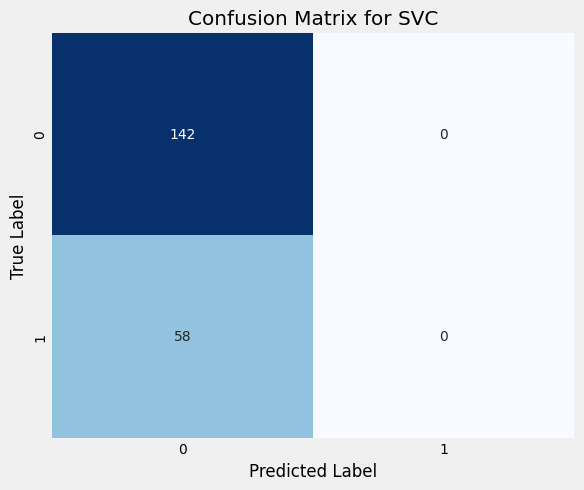

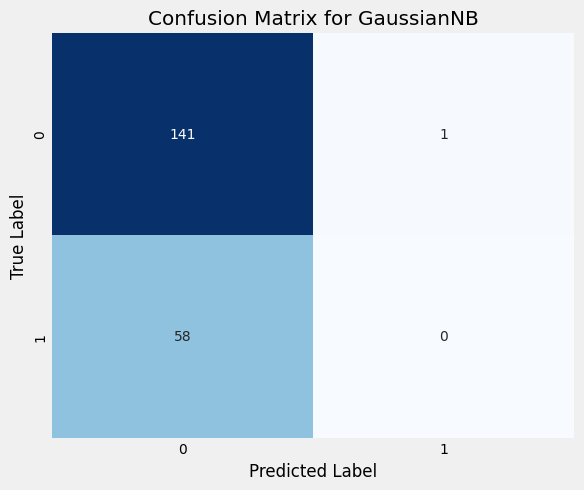

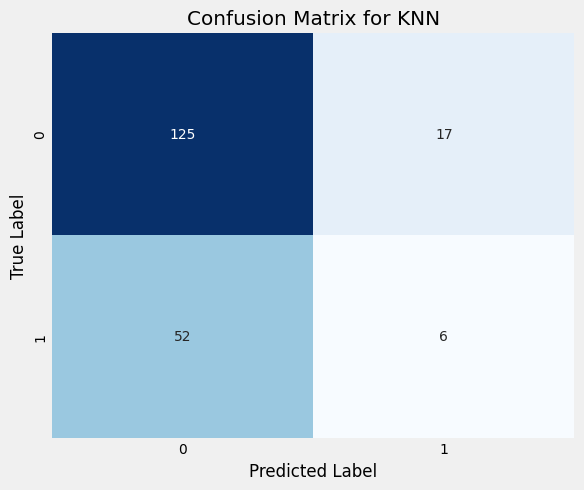

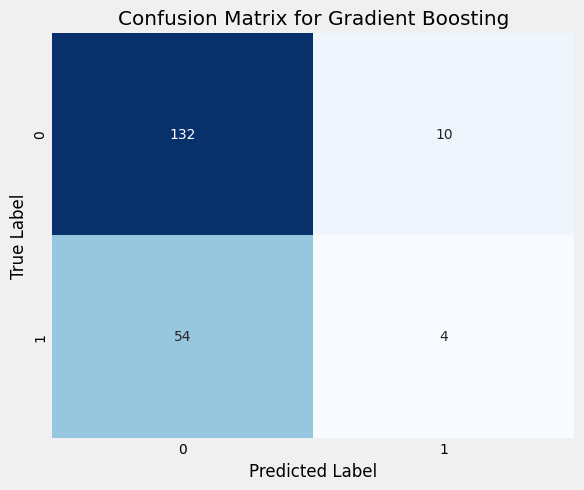

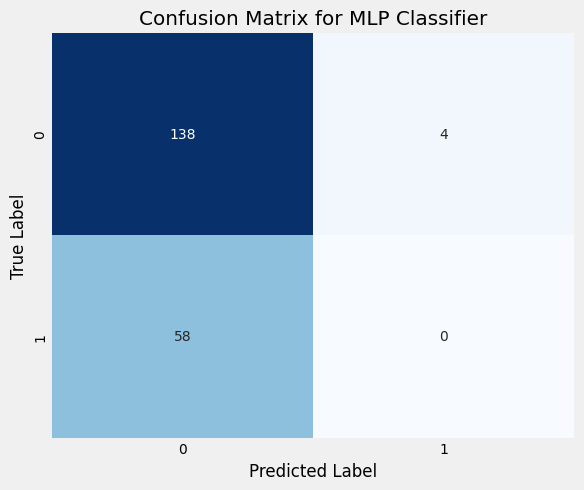

In [64]:
# f trained models
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 
               'GaussianNB', 'KNN', 'Gradient Boosting', 'MLP Classifier']


models[3] = SVC(probability=True)  # Ensure SVC is set to output probabilities

for i, model in enumerate(models):
    # Fit and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    # Confusion matrix
    cm = confusion_matrix(y_valid, y_pred)
    
    # Plot heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_names[i]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### Learning curves

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

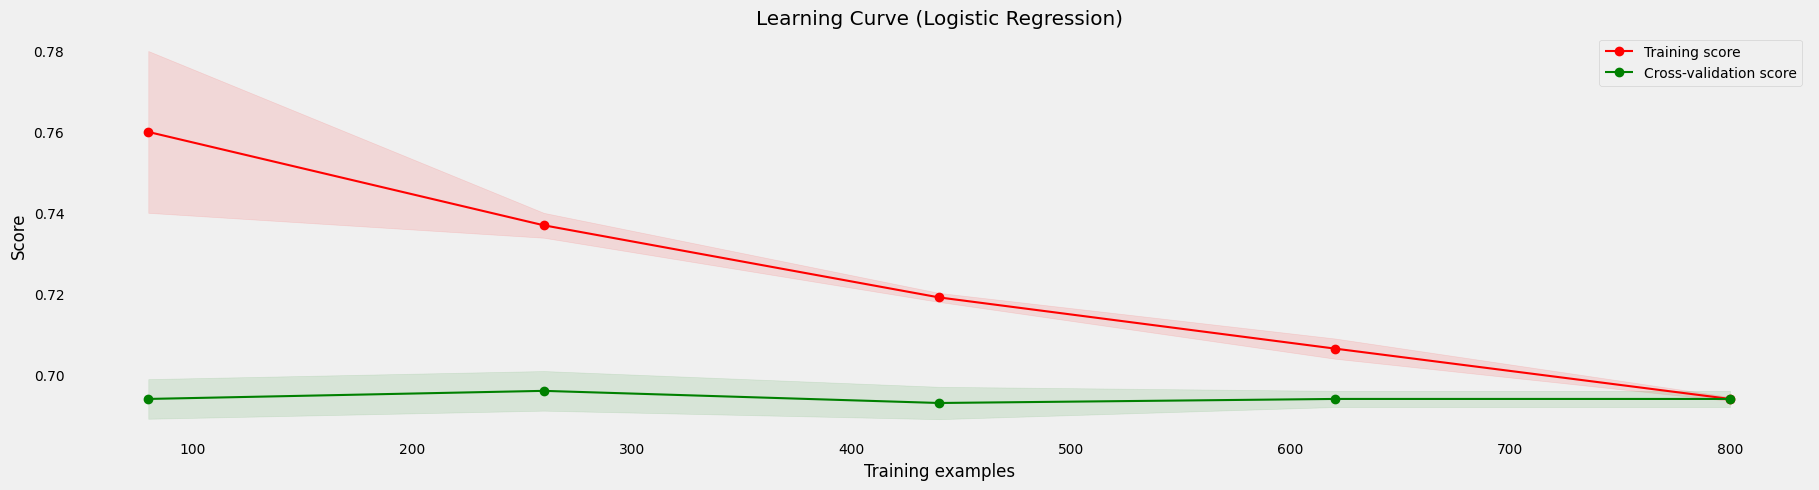

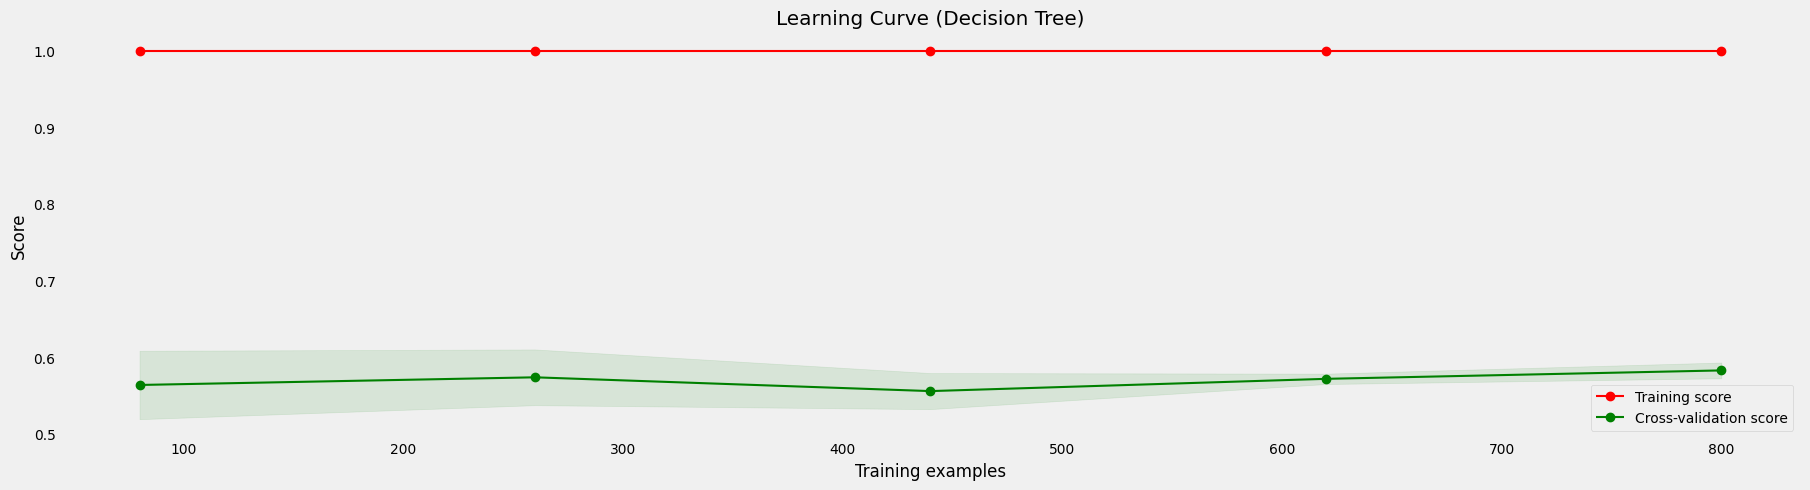

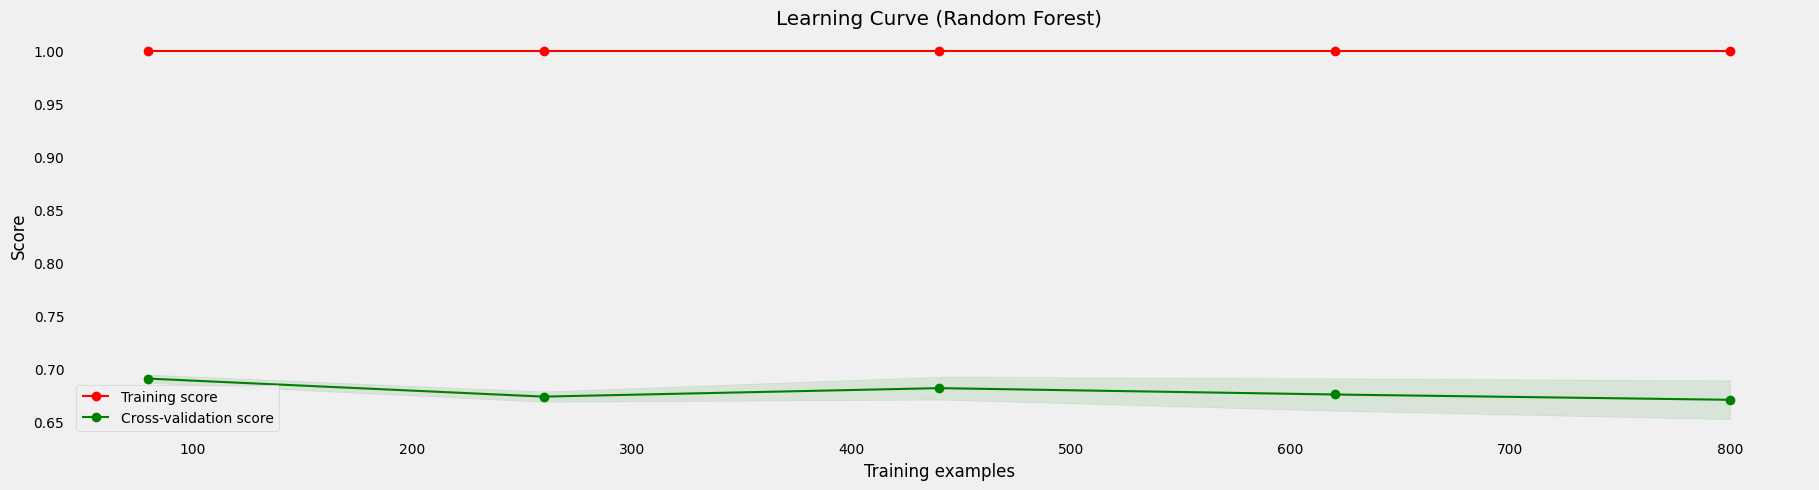

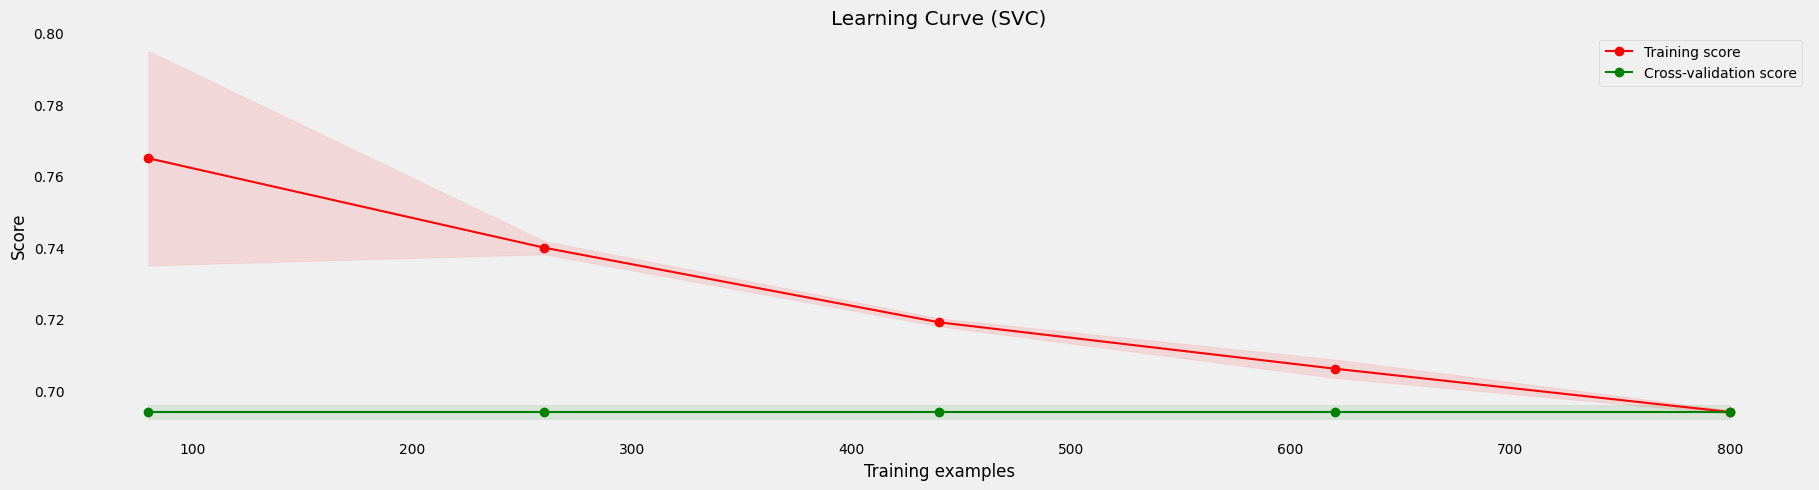

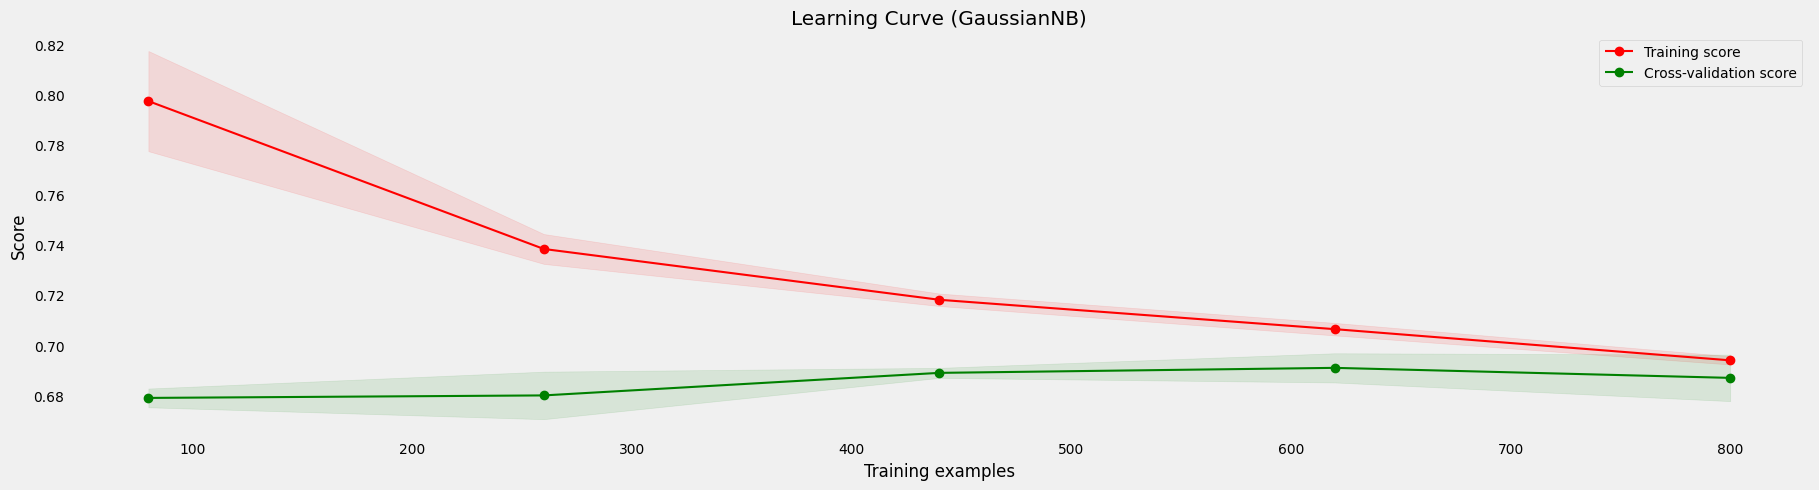

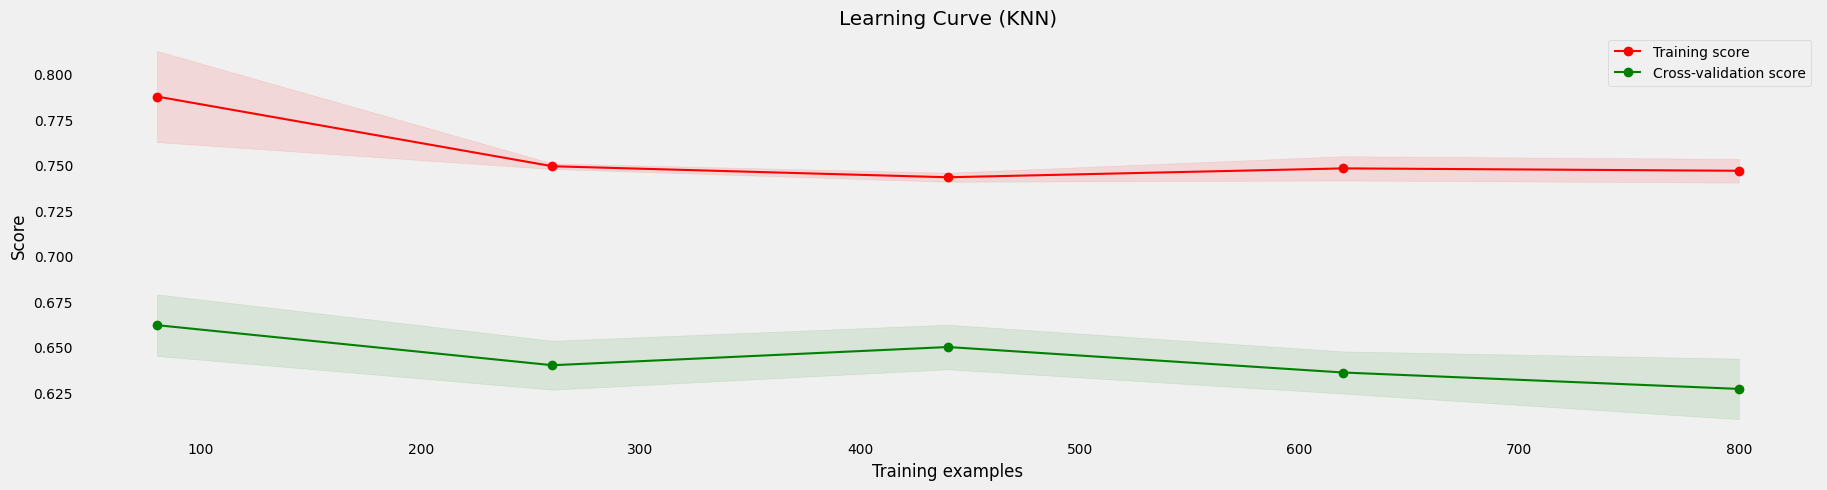

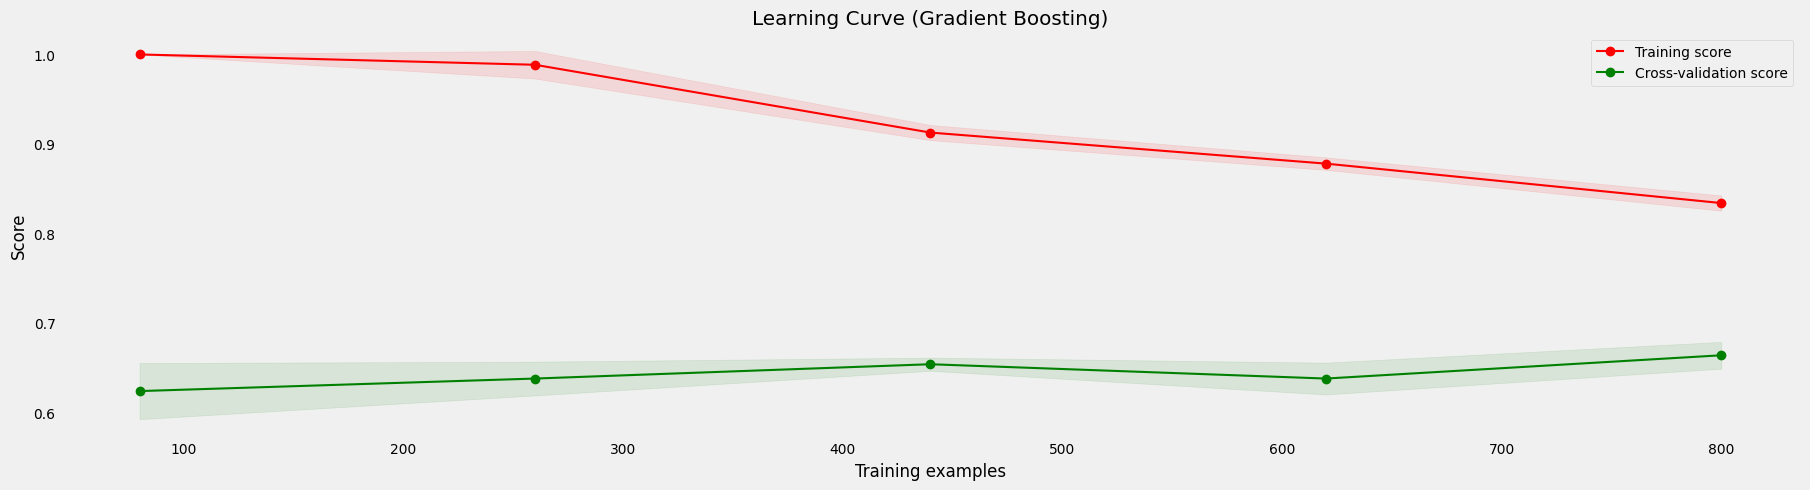

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

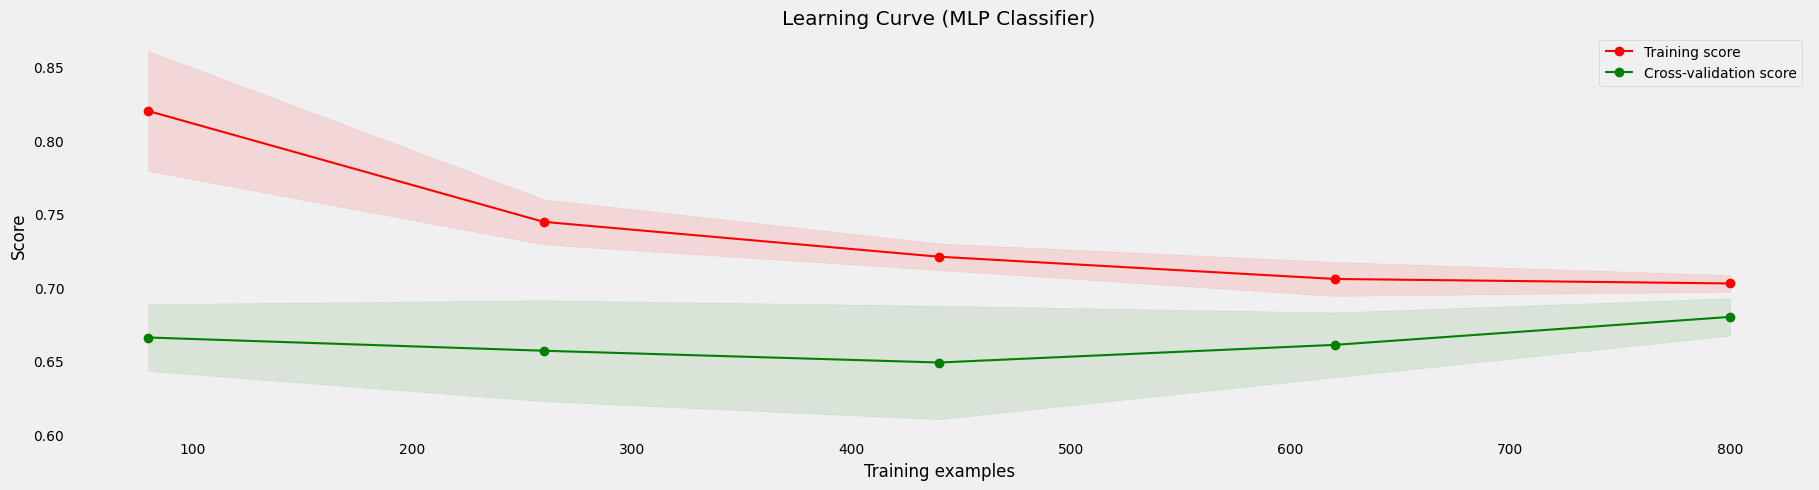

In [68]:
# Load your dataset
diabetes = pd.read_csv("Diabetes_prediction.csv")

# Define your features and target variable
X = diabetes.drop('Diagnosis', axis=1)  # Features
y = diabetes['Diagnosis']                # Target variable

# Adjusting the model list if necessary, enabling probability for SVC
models[3] = SVC(probability=True)

# Assuming 'models' and 'model_names' are correctly defined as shown previously
for i, model in enumerate(models):
    plot_learning_curve(model, f'Learning Curve ({model_names[i]})', X, y, cv=5, n_jobs=-1)
    plt.show()


## 6. Parameter Tuning

In [84]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=5, scoring="accuracy"):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 4))  # Adjust the figure size if necessary
    plt.plot(param_range, train_scores_mean, label="Training accuracy", color="darkorange")
    plt.plot(param_range, test_scores_mean, label="Cross-validation accuracy", color="navy")

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy") 
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

### 1. Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

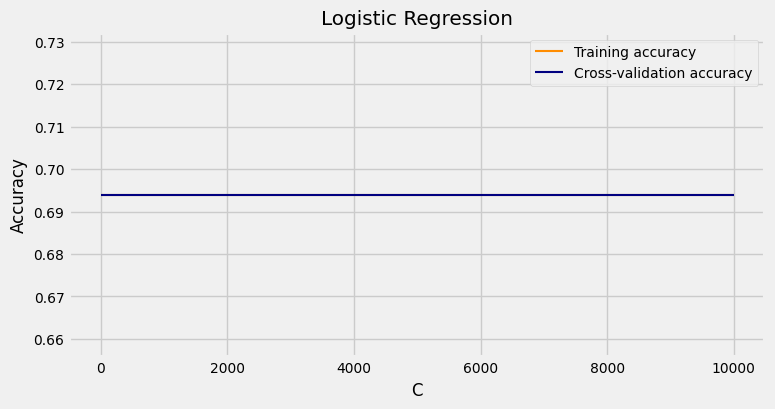

In [86]:
plot_validation_curve(LogisticRegression(), "Logistic Regression", X, y, 
                      param_name="C", param_range=np.logspace(-4, 4, 5))

### 2. Decision Tree Classifier

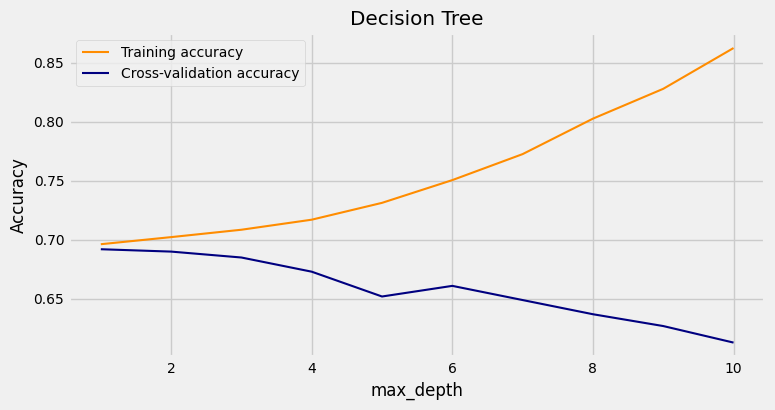

In [87]:
plot_validation_curve(DecisionTreeClassifier(), "Decision Tree", X, y, 
                      param_name="max_depth", param_range=np.arange(1, 11))

### 3. Random Forest Classifier

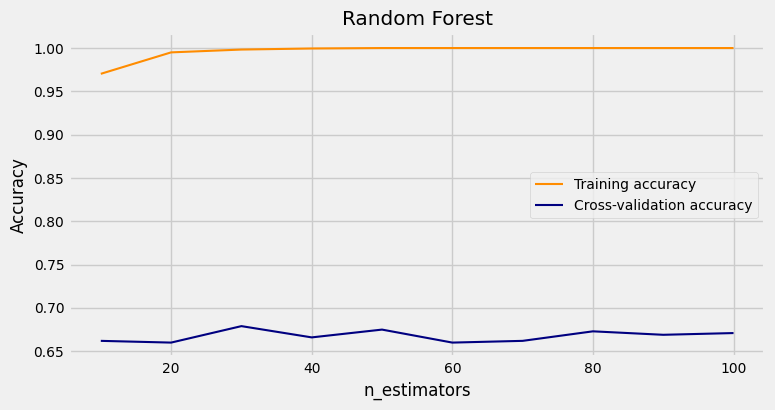

In [88]:
plot_validation_curve(RandomForestClassifier(), "Random Forest", X, y, 
                      param_name="n_estimators", param_range=np.arange(10, 110, 10))


### 4. Support Vector Classifier (SVC)

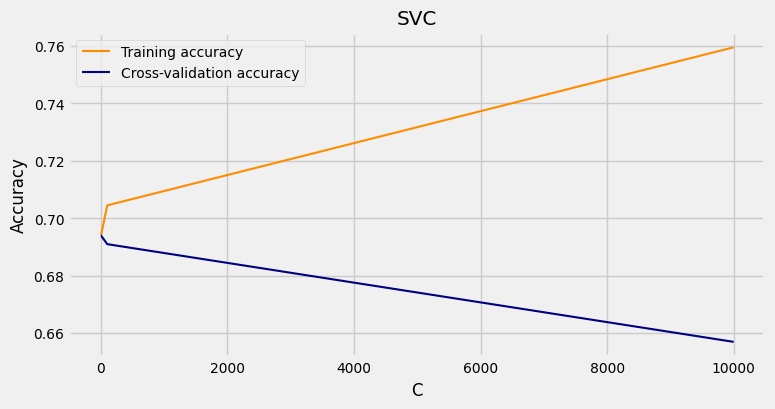

In [89]:
plot_validation_curve(SVC(), "SVC", X, y, 
                      param_name="C", param_range=np.logspace(-4, 4, 5))


### 5. Gaussian Naive Bayes

GaussianNB doesn't have hyperparameters that are commonly tuned, so it's often used as is.

### 6. K-Neighbors Classifier

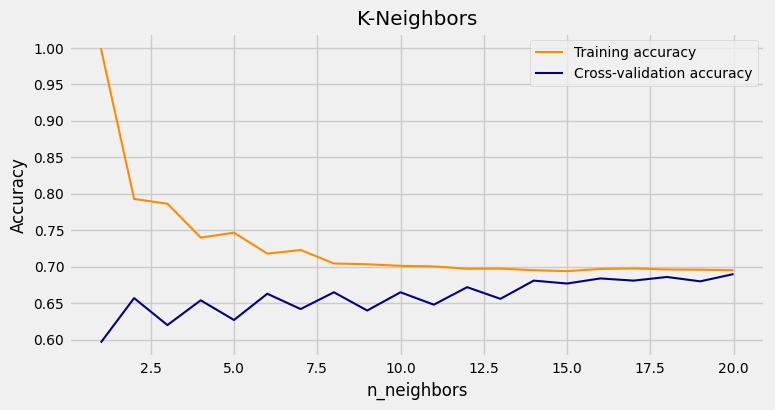

In [90]:
plot_validation_curve(KNeighborsClassifier(), "K-Neighbors", X, y, 
                      param_name="n_neighbors", param_range=np.arange(1, 21))


### 7. Gradient Boosting Classifier

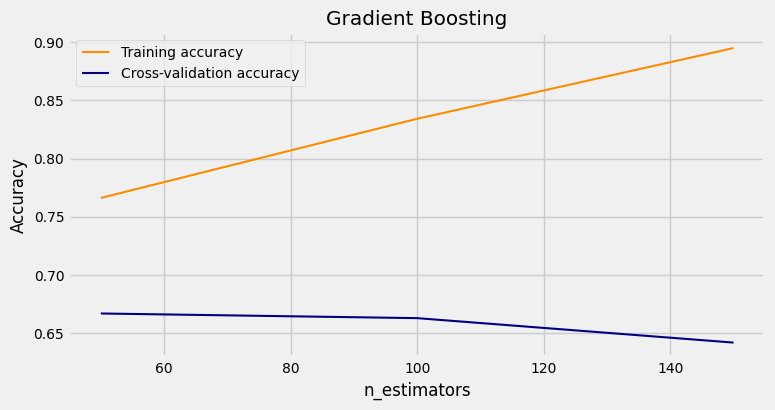

In [91]:
plot_validation_curve(GradientBoostingClassifier(), "Gradient Boosting", X, y, 
                      param_name="n_estimators", param_range=np.arange(50, 151, 50))


### 8. MLP Classifier

For Neural Networks like MLPClassifier, the number of neurons in hidden layers hidden_layer_sizes can be a parameter to tune.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

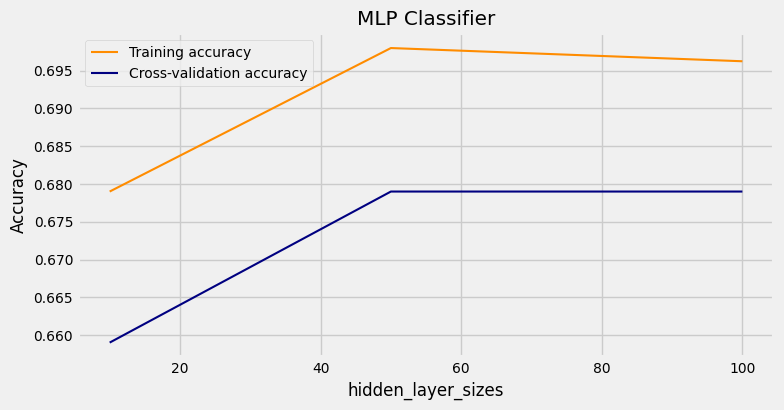

In [93]:
plot_validation_curve(MLPClassifier(), "MLP Classifier", X, y, 
                      param_name="hidden_layer_sizes", param_range=[(10,), (50,), (100,)])


After carefully analyzing the learning curves of the eight models, the selection process aims to identify the model that demonstrates the best learning behavior, balanced between underfitting and overfitting, and shows the most promise in terms of generalization to unseen data. The learning curve analysis helps in pinpointing the model that, with optimal hyperparameter tuning, is likely to offer the highest performance.

In this case, based on the analysis of the learning curves, the Gradient Boosting model has been identified as exhibiting superior learning performance. It is observed that with around 55 estimators, the model achieves an optimal balance, suggesting this as the best hyperparameter setting for this specific dataset and problem.

Subsequently, the Gradient Boosting model, optimized with 55 estimators, will be re-evaluated to ascertain its performance across key metrics: Accuracy, Precision, Recall, F1 Score, and AUC. This re-evaluation is crucial for a comprehensive understanding of the optimized model's capabilities and ensuring its efficacy in making predictions. The results from this evaluation will be compiled into a table, presenting a clear and concise overview of the optimized model's performance across the aforementioned metrics. This step is instrumental in validating the selection and optimization process, ensuring the chosen model is indeed the best fit for the problem at hand.


In [94]:
chosen_model = GradientBoostingClassifier(n_estimators=55)

chosen_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=55)

## 7. Make Prediction

In [99]:
# diabetes

new_cases = pd.DataFrame({
    'Pregnancies': np.random.randint(0, 10, size=15),
    'Glucose': np.random.randint(80, 200, size=15),
    'BloodPressure': np.random.randint(50, 100, size=15),
    'SkinThickness': np.random.randint(20, 50, size=15),
    'Insulin': np.random.randint(30, 300, size=15),
    'BMI': np.random.uniform(18, 50, size=15),
    'DiabetesPedigreeFunction': np.random.uniform(0.1, 1.2, size=15),
    'Age': np.random.randint(21, 60, size=15)
})


In [100]:
print("New cases for prediction:")
print(new_cases)

New cases for prediction:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0             9      175             60             45      105  30.652127   
1             0      196             65             26      276  21.269909   
2             3      172             77             27      296  41.481097   
3             2      155             89             34      210  39.372084   
4             8      152             75             49       93  28.113291   
5             5      166             61             42      268  31.390827   
6             3      170             70             25       79  34.515813   
7             2      102             81             47      255  26.769254   
8             7      106             56             24       88  40.739678   
9             5      144             65             26      105  42.956271   
10            2      118             88             36      291  28.007308   
11            2      122             7

### Step 2: Make Predictions with the Chosen Model

In [101]:
# Use the chosen model to make predictions on the new cases
predicted_diagnoses = chosen_model.predict(new_cases)

# Add the predictions to the new_cases DataFrame for easy viewing
new_cases['Predicted Diagnosis'] = predicted_diagnoses

print("\nNew cases with predicted 'Diagnosis':")
print(new_cases)



New cases with predicted 'Diagnosis':
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0             9      175             60             45      105  30.652127   
1             0      196             65             26      276  21.269909   
2             3      172             77             27      296  41.481097   
3             2      155             89             34      210  39.372084   
4             8      152             75             49       93  28.113291   
5             5      166             61             42      268  31.390827   
6             3      170             70             25       79  34.515813   
7             2      102             81             47      255  26.769254   
8             7      106             56             24       88  40.739678   
9             5      144             65             26      105  42.956271   
10            2      118             88             36      291  28.007308   
11            2      122 

## 8.ML Ops


Implementing a machine learning model into production, commonly referred to as MLOps, involves a series of steps to deploy, monitor, and maintain models in a production environment. Each major cloud provider (Azure, AWS, and GCP) offers tools and services for MLOps. Below is an overview of how you might approach deploying your model on each platform. Note that the actual deployment will involve using the respective cloud provider's SDKs and services, and detailed commands or code snippets might vary based on the specific service and configuration you choose.


### Azure Machine Learning

Register the Model: First, you register your trained model in Azure Machine Learning workspace.
Create a Scoring Script: Write a Python script (score.py) that loads the registered model and defines how it will be used for scoring.
Create an Environment: Define an environment with all the necessary dependencies.
Deploy the Model: Deploy the model as a web service to Azure Container Instances (ACI) or Azure Kubernetes Service (AKS) for scalable production use.

In [ ]:
# This is a simplified outline. Azure Machine Learning SDK would be used in practice.

from azureml.core import Workspace
from azureml.core.model import Model
from azureml.core.container_registry import ContainerRegistry
from azureml.core import Environment
from azureml.core.model import InferenceConfig
from azureml.core.webservice import AciWebservice, Webservice

# Connect to the Azure ML workspace
workspace = Workspace.from_config()

# Register the model
model = Model.register(workspace=workspace,
                       model_path="<path_to_your_model>",
                       model_name="GradientBoostingClassifier")

# Create an inference config
inference_config = InferenceConfig(runtime= "python",
                                   entry_script="score.py",
                                   conda_file="<path_to_your_env_file>")

# Deploy the model as a web service
deployment_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)
service = Model.deploy(workspace=workspace, 
                       name="gradient-boosting-service", 
                       models=[model], 
                       inference_config=inference_config, 
                       deployment_config=deployment_config)

service.wait_for_deployment(show_output=True)


### AWS SageMaker

Create a Model: Upload your model to Amazon S3 and then create a model in SageMaker.
Create an Endpoint Configuration: Define how SageMaker hosts your model, including the instance type and scaling settings.
Deploy the Model to an Endpoint: Use the endpoint configuration to deploy your model.

In [ ]:
# This is a simplified outline. AWS SDK for Python (Boto3) would be used in practice.

import sagemaker
from sagemaker.model import Model
from sagemaker import get_execution_role

sagemaker_session = sagemaker.Session()
role = get_execution_role()

# Create a SageMaker model
model = Model(model_data="s3://<your_bucket>/<path_to_your_model.tar.gz>",
              image_uri="<inference_image_uri>",
              role=role,
              sagemaker_session=sagemaker_session)

# Deploy the model to an endpoint
predictor = model.deploy(instance_type='ml.m4.xlarge',
                         initial_instance_count=1)


### Google Cloud Platform (GCP)

Upload the Model to Google Cloud Storage (GCS): First, upload your trained model to GCS.
Create a Model and Version in AI Platform: Use the AI Platform to create a model resource and then create a version of that model by specifying the GCS path where the model is stored.
Deploy the Model: Deploy the model version to get predictions.

In [ ]:
# This is a simplified outline. Google Cloud SDK (gcloud) commands or Google Cloud Python Client Library would be used in practice.

from google.cloud import aiplatform

# Initialize the AI Platform client
client = aiplatform.gapic.ModelServiceClient()

# Create a model resource in AI Platform
model = client.create_model(parent=aiplatform.gapic.ModelServiceClient.common_location_path('your-project-id', 'us-central1'),
                            model={"display_name": "gradient_boosting_model"})

# Create a model version
version = client.create_version(parent=model.name,
                                version={"name": "v1",
                                         "deployment_uri": "gs://<your_bucket>/<path_to_your_model>",
                                         "runtime_version": "2.1",
                                         "python_version": "3.7",
                                         "machine_type": "n1-standard-4"})


Deploying models to production in these cloud environments requires careful consideration of your application's requirements, including scalability, latency, and security. Each cloud provider offers extensive documentation on deploying machine learning models, which can provide more detailed guidance and best practices.

## Session information

In [61]:
import session_info
session_info.show(html=False)

-----
joblib              1.3.2
matplotlib          3.8.3
numpy               1.26.1
pandas              2.1.1
seaborn             0.13.2
session_info        1.0.0
sklearn             1.4.1.post1
-----
IPython             8.16.1
jupyter_client      8.5.0
jupyter_core        5.4.0
-----
Python 3.11.6 (v3.11.6:8b6ee5ba3b, Oct  2 2023, 11:18:21) [Clang 13.0.0 (clang-1300.0.29.30)]
macOS-13.5.2-x86_64-i386-64bit
-----
Session information updated at 2024-03-28 15:49
